<a href="https://colab.research.google.com/github/kamm8899/CatVSDog/blob/main/CatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install patool

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patoolib

In [ ]:
patoolib.extract_archive('/content/drive/MyDrive/test3.zip')
patoolib.extract_archive('/content/drive/MyDrive/train5.zip')

INFO patool: Extracting /content/drive/MyDrive/test3.zip ...
INFO:patool:Extracting /content/drive/MyDrive/test3.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_bgclglk_ -- /content/drive/MyDrive/test3.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_bgclglk_ -- /content/drive/MyDrive/test3.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/test3.zip extracted to `test3' (local file exists).
INFO:patool:... /content/drive/MyDrive/test3.zip extracted to `test3' (local file exists).
INFO patool: Extracting /content/drive/MyDrive/train5.zip ...
INFO:patool:Extracting /content/drive/MyDrive/train5.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_bp2o9ati -- /content/drive/MyDrive/train5.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_bp2o9ati -- /content/drive/MyDrive/train5.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/train5.zip extracted to `train51' (multiple fil

'train51'

In [ ]:
img_size = (100, 100)
batch_size = 64

In [ ]:
# Creating training and testing sets
training_set =tf.keras.utils.image_dataset_from_directory('/content/train51/train',
                                                 image_size = img_size,
                                                 batch_size = batch_size,
                                                 label_mode = 'binary',
                                                class_names = ['cat', 'dog'])

test_set = tf.keras.utils.image_dataset_from_directory('/content/test3/test1',
                                            image_size = img_size,
                                            batch_size = batch_size,
                                            label_mode = None)


Found 25000 files belonging to 2 classes.
Found 12500 files belonging to 1 classes.


In [ ]:
#Attempt 1 as is at 10 Epochs
# Defining the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model =model.fit(training_set,epochs=10)

Epoch 1/10
391/391 [==============================] - 695s 2s/step - loss: 3.6929 - accuracy: 0.5880
Epoch 2/10
391/391 [==============================] - 695s 2s/step - loss: 0.6131 - accuracy: 0.6586
Epoch 3/10
391/391 [==============================] - 700s 2s/step - loss: 0.5568 - accuracy: 0.7129
Epoch 4/10
391/391 [==============================] - 686s 2s/step - loss: 0.4627 - accuracy: 0.7781
Epoch 5/10
391/391 [==============================] - 693s 2s/step - loss: 0.3582 - accuracy: 0.8381
Epoch 6/10
391/391 [==============================] - 698s 2s/step - loss: 0.2668 - accuracy: 0.8877
Epoch 7/10
391/391 [==============================] - 688s 2s/step - loss: 0.2457 - accuracy: 0.8990
Epoch 8/10
391/391 [==============================] - 688s 2s/step - loss: 0.1585 - accuracy: 0.9377
Epoch 9/10
391/391 [==============================] - 694s 2s/step - loss: 0.1413 - accuracy: 0.9472
Epoch 10/10
391/391 [==============================] - 686s 2s/step - loss: 0.1106 - accura

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


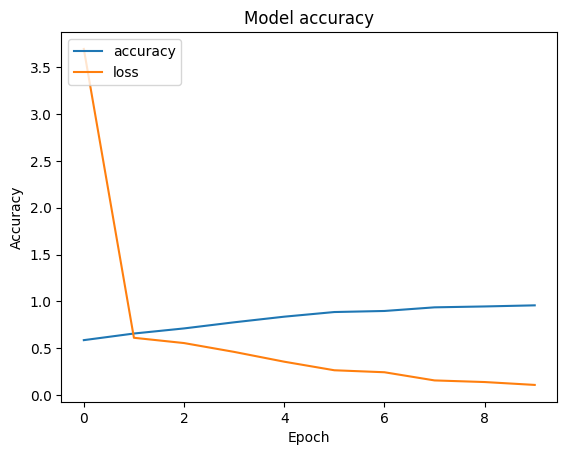

In [ ]:
#Plotting Accuracy

plt.plot(CNN_model.history['accuracy'])
plt.plot(CNN_model.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()
#accuracy has a ceiling of 1, accuracy rose loss decreased

In [ ]:

#predict
#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predictions = model.predict(test_set) #what is my xtest

#actuals = list(test_set) #what is my ytest

#sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
#sub.to_csv('./output_catordog.csv', index=False)

196/196 [==============================] - 112s 569ms/step


In [ ]:
#creates array 0/1
pred_label = np.where(predictions.flatten()<0.5,1,0)
pred_label
index= np.arange(1,12501)
result = pd.DataFrame({'id':index, 'label': pred_label})
result.to_csv('/content/drive/MyDrive/cat_dog_predictions.csv')

In [ ]:
len(pred_label)
len(index)

25000

In [ ]:
#Attempt 2
# Creating training and testing sets
training_set, validation_set =tf.keras.utils.image_dataset_from_directory('/content/train51/train',
                                                 image_size = img_size,
                                                 batch_size = batch_size,
                                                 label_mode = 'binary',
                                                 seed = 0,
                                                 validation_split = 0.2,
                                                 subset= 'both',
                                                 class_names = ['cat', 'dog'])




Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
training_set = training_set.map(lambda x, y: (normalization_layer(x),y))
validation_set=validation_set.map(lambda x, y: (normalization_layer(x),y))

In [39]:
#adding Normalization, scaling data and adding validation set
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
attempt2_model =model.fit(training_set,epochs=10, validation_data=validation_set)

Epoch 1/10
313/313 [==============================] - 676s 2s/step - loss: 0.9879 - accuracy: 0.7064 - val_loss: 1.2722 - val_accuracy: 0.5106
Epoch 2/10
313/313 [==============================] - 620s 2s/step - loss: 0.3893 - accuracy: 0.8237 - val_loss: 0.4966 - val_accuracy: 0.7678
Epoch 3/10
313/313 [==============================] - 592s 2s/step - loss: 0.2933 - accuracy: 0.8773 - val_loss: 0.5341 - val_accuracy: 0.7818
Epoch 4/10
313/313 [==============================] - 674s 2s/step - loss: 0.2048 - accuracy: 0.9152 - val_loss: 0.6048 - val_accuracy: 0.8030
Epoch 5/10
313/313 [==============================] - 672s 2s/step - loss: 0.1467 - accuracy: 0.9438 - val_loss: 0.6963 - val_accuracy: 0.7972
Epoch 6/10
313/313 [==============================] - 642s 2s/step - loss: 0.1022 - accuracy: 0.9621 - val_loss: 0.5752 - val_accuracy: 0.8096
Epoch 7/10
313/313 [==============================] - 663s 2s/step - loss: 0.0746 - accuracy: 0.9734 - val_loss: 0.8334 - val_accuracy: 0.7838

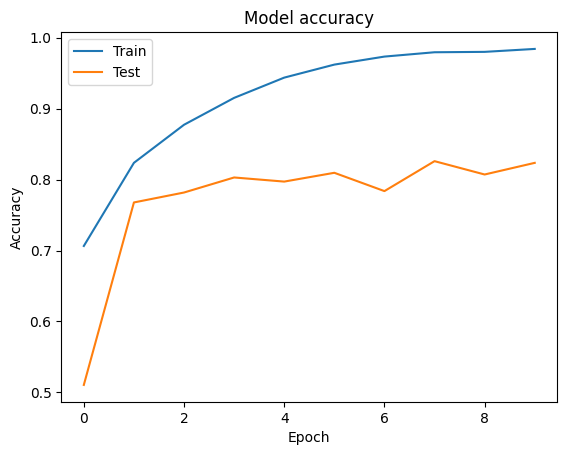

In [40]:
#plotting accuracy
plt.plot(attempt2_model.history['accuracy'])
plt.plot(attempt2_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

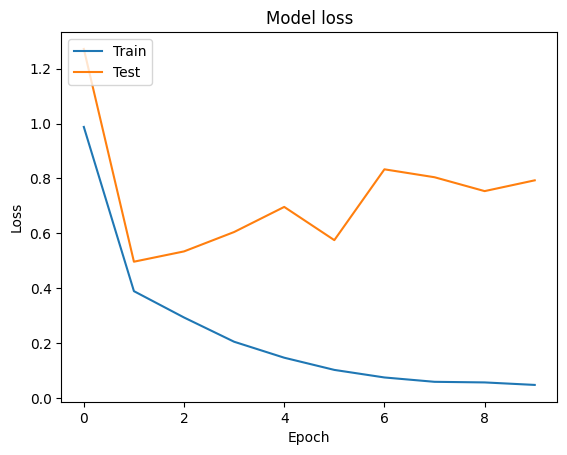

In [41]:
#plotting loss
plt.plot(attempt2_model.history['loss'])
plt.plot(attempt2_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
#evaluate
score = attempt2_model.evaluate(validation_set)
print()
print('Test accuracy: ', score[1])

AttributeError: 'History' object has no attribute 'evaluate'

In [43]:
#Make plot for training and validation set
#two plots one for loss one for accruacy
#predict
#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predictions = attempt2_model.predict(test_set) #what is my xtest

#actuals = list(test_set) #what is my ytest

#sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
#sub.to_csv('./output_catordog.csv', index=False)
#creates array 0/1
pred_label = np.where(predictions.flatten()<0.5,1,0)
pred_label
index= np.arange(1,12501)
result = pd.DataFrame({'id':index, 'label': pred_label})
result.to_csv('/content/drive/MyDrive/cat_dog_predictions2.csv')


AttributeError: 'History' object has no attribute 'predict'

In [ ]:
#ANN
#add layer to conv or change EPOCHS
#Restnet
#Autoencoder